# Library Imports

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as immg
import cv2
from google.colab import drive
from google.colab.patches import cv2_imshow
drive.mount('/content/drive')

import pandas as pd

Mounted at /content/drive


In [ ]:
anno = pd.read_csv('/content/drive/MyDrive/ENEE 439D Final Project/pcb_formatted_annotations.csv', sep = "\t")
anno.head()

,Unnamed: 0,xmin,ymin,xmax,ymax,class,file,width,height
0,0,1959,1326,2008,1431,spur,04_spur_12,3056,2464
1,1,659,1219,759,1268,spur,04_spur_12,3056,2464
2,2,859,1118,928,1161,spur,04_spur_12,3056,2464
3,3,2166,877,2224,962,spur,04_spur_13,3056,2464
4,4,521,2277,595,2337,spur,04_spur_13,3056,2464


# Feature Detection with SURF?

In [23]:
#template = cv2.imread("/content/drive/MyDrive/ENEE 439D Final Project/PCB_DATASET/aerospace_corp_defects/MAXQ7667EVKIT-1#-ND/template_back.png")
template = cv2.imread("/content/drive/MyDrive/ENEE 439D Final Project/PCB_DATASET/aerospace_corp_defects/MAXQ7667EVKIT-1#-ND/2/rear.png")
defect1 = cv2.imread("/content/drive/MyDrive/ENEE 439D Final Project/PCB_DATASET/aerospace_corp_defects/MAXQ7667EVKIT-1#-ND/1/rear.png")
gray_template = cv2.cvtColor(template,cv2.COLOR_BGR2GRAY)
gray_defect1 = cv2.cvtColor(defect1,cv2.COLOR_BGR2GRAY)

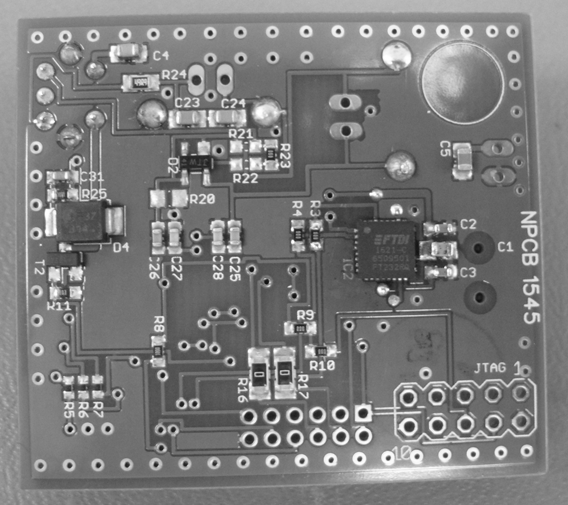

In [24]:
cv2_imshow(gray_template)

In [11]:
gray_template = cv2.Canny(gray_template, 85, 90, 3)

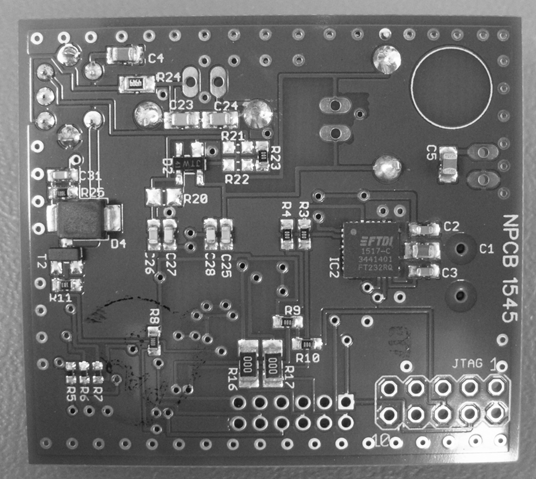

In [5]:
cv2_imshow(gray_defect1)

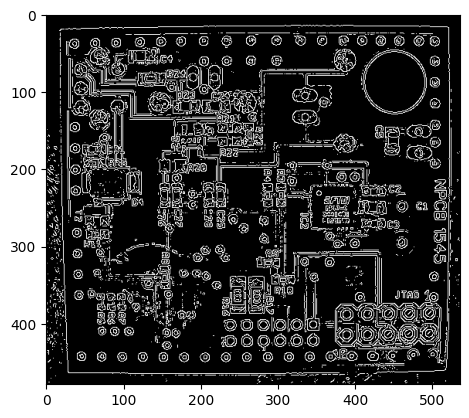

In [6]:
edges = cv2.Canny(gray_defect1, 90,90, 105)
plt.imshow(edges,cmap = 'gray')

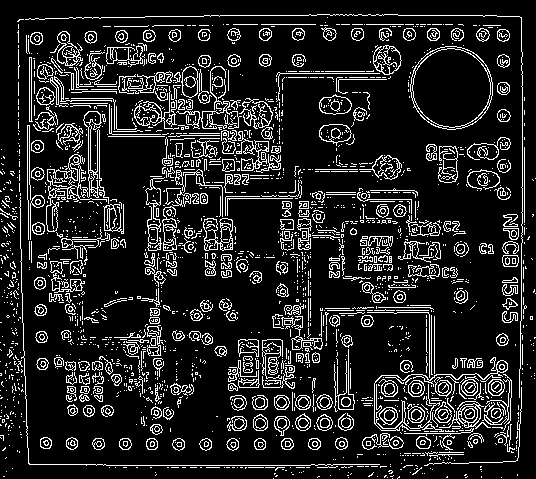

In [ ]:
cv2_imshow(edges)

## Finding Circles within the Image

In [25]:
gray_template = cv2.GaussianBlur(gray_template,(7,7),0)
detected_circles = cv2.HoughCircles(gray_template,cv2.HOUGH_GRADIENT,1,5, minRadius = 10, maxRadius = 12, param2=1, param1=100)

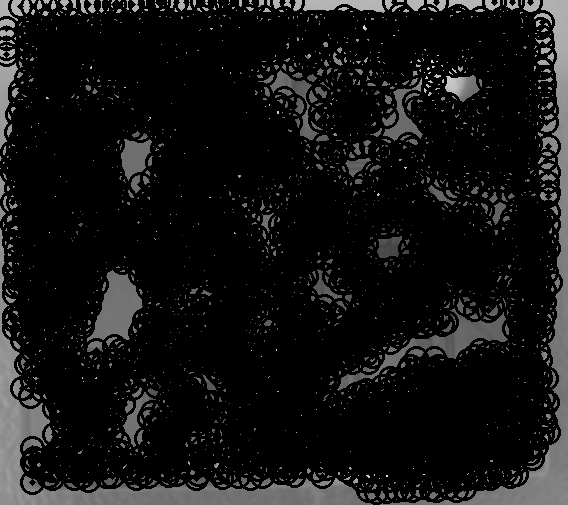

In [26]:
if detected_circles is not None:
  
    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))
  
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
  
        # Draw the circumference of the circle.
        cv2.circle(gray_template, (a, b), r, (0, 255, 0), 2)
  
        # Draw a small circle (of radius 1) to show the center.
        cv2.circle(gray_template, (a, b), 1, (0, 0, 255), 3)
        
cv2_imshow(gray_template)

In [ ]:
sobely = cv2.Sobel(src=gray_defect1, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=1)

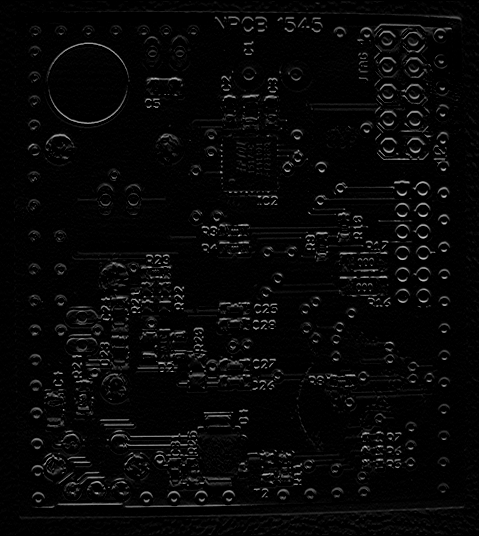

In [ ]:
cv2_imshow(sobely)

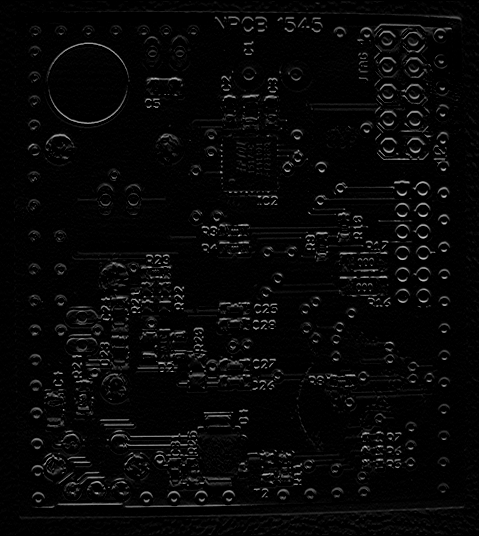

In [ ]:
sobelx = cv2.Sobel(src=gray_defect1, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=1)
cv2_imshow(sobely)

## Using SIFT for Keypoint Matching Between Template + Defect

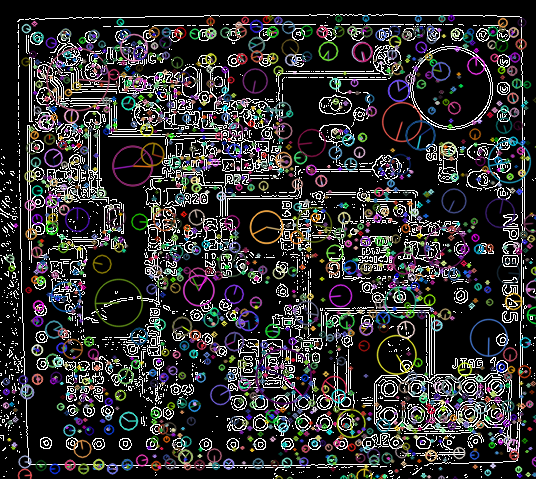

In [ ]:
sift = cv2.SIFT_create()
kp = sift.detect(gray_template, None)
cv2_imshow(cv2.drawKeypoints(edges,kp,gray_template,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))

In [ ]:
template = cv2.imread("/content/drive/MyDrive/Colab Notebooks/images/01.JPG")
defect = cv2.imread("/content/drive/MyDrive/Colab Notebooks/images/01_missing_hole_01.jpg")
template = cv2.cvtColor(template,cv2.COLOR_BGR2GRAY)
defect = cv2.cvtColor(defect,cv2.COLOR_BGR2GRAY)

In [ ]:
sift = cv2.SIFT_create()
kp = sift.detect(template, None)
cv2_imshow(cv2.drawKeypoints(defect,kp,template,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))

Output hidden; open in https://colab.research.google.com to view.